In [34]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
import scipy.stats as stats
#Preprocessing
from sklearn.preprocessing import LabelEncoder , MinMaxScaler , QuantileTransformer , PowerTransformer
#Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Exploring Data

#Load Data

#Data
df = pd.read_csv('/content/Iris.csv')

In [36]:
# Drooping Id
df.drop(columns=['Id'],inplace=True)

In [37]:
#Head Of Data
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
# Shape of Data

# Checking the number of rows and columns
#Data
num_train_rows, num_train_columns = df.shape
#Printing the number of rows and columns.
print("Iris Flower Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")



Iris Flower Data:
Number of Rows: 150
Number of Columns: 5



In [39]:
# Null Values in Train
df_null = df.isnull().sum().sum()

print(f'Null Count in Data: {df_null}')



Null Count in Data: 0


In [40]:
# Count duplicate rows in train_data
data_duplicates = df.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in Data: {data_duplicates}")

Number of duplicate rows in Data: 3


In [41]:
# Info of Data

#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Here are the details about the data:

    Rows: 150
    Columns: 5
    Categorical Features: 1 (Species)
    Numerical Features: 4 (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm)

In [42]:
# Descriptive Statistic Of Numerical Featres

#Descriptive statistics
df.describe()



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
# Categorical Columns Of Data

# Printing Columns That Have Dtype is Object or categorical.
object_columns = df.select_dtypes(include=['object']).columns
print(f'The Following Columns Have Dtype as Object \n: {object_columns}')
print(f'The Value Count of Categorical Columns is : {object_columns.value_counts().sum()}')



The Following Columns Have Dtype as Object 
: Index(['Species'], dtype='object')
The Value Count of Categorical Columns is : 1


In [44]:
# Numerical Columns Of Data

# Printing Columns That Have Dtype is FLoat or int
float_columns = df.select_dtypes(include=['float','int']).columns
print(f'The Following Columns Have Dtype as Float and int :\n{float_columns}')
print(f'The Value Count of Float Columns is : {float_columns.value_counts().sum()}')



The Following Columns Have Dtype as Float and int :
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
The Value Count of Float Columns is : 4


# Eda (Exploraitary Data Analysis)
Exploratory Data Analysis (EDA) is a crucial initial step in data analysis, aimed at understanding the data's characteristics and uncovering insights. It involves techniques like summary statistics, data visualization, and data cleaning to gain familiarity with the dataset. EDA helps identify patterns, trends, and outliers, guiding further analysis and hypothesis formulation. It assists in determining the suitability of data for specific analyses, detecting errors, and selecting appropriate models. EDA is iterative and interactive, involving constant refinement as insights are uncovered. It aids in making informed decisions, generating hypotheses, and preparing data for modeling, enhancing the overall understanding of the dataset.



# Uni-Variate Analysis


Univariate analysis is a statistical method used to analyze a single variable at a time. It focuses on understanding the characteristics and distribution of a single variable, such as its central tendency, dispersion, and shape of the distribution. Common techniques in univariate analysis include measures of central tendency (e.g., mean, median, mode), measures of dispersion (e.g., variance, standard deviation), and graphical representations (e.g., histograms, box plots). By examining a single variable in isolation, univariate analysis provides insights into its behavior and variability, serving as a foundational step in statistical analysis to understand the individual characteristics of variables before exploring their relationships with other variables.


In [45]:
def print_feature_stats(df):
    numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
    for feature in numeric_features:
        feature_data = df[feature]
        feature_mean = feature_data.mean()
        feature_median = feature_data.median()
        feature_std = feature_data.std()
        feature_count = feature_data.count()

        print(f"Feature: {feature}")
        print(f"Mean: {feature_mean:.2f}")
        print(f"Median: {feature_median:.2f}")
        print(f"Standard Deviation: {feature_std:.2f}")
        print(f"Count: {feature_count}")
        print()
print_feature_stats(df)

Feature: SepalLengthCm
Mean: 5.84
Median: 5.80
Standard Deviation: 0.83
Count: 150

Feature: SepalWidthCm
Mean: 3.05
Median: 3.00
Standard Deviation: 0.43
Count: 150

Feature: PetalLengthCm
Mean: 3.76
Median: 4.35
Standard Deviation: 1.76
Count: 150

Feature: PetalWidthCm
Mean: 1.20
Median: 1.30
Standard Deviation: 0.76
Count: 150



In [46]:
# Numerical Features

numerical_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
# Calculate the number of rows and columns needed for subplots
num_cols = 2
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # Calculate number of rows based on columns

# Create subplots with the calculated number of rows and columns
fig = make_subplots(rows=num_rows, cols=num_cols)

# Loop through numerical columns and add boxplots with color
for i, col in enumerate(numerical_features, start=1):
    row_num = (i - 1) % num_rows + 1
    col_num = (i - 1) // num_rows + 1
    fig.add_trace(
        go.Box(
            x=df[col],
            name=col,
            marker_color='#1f77b4',  # Set box color
            line_color='#1f77b4'     # Set mean line color
        ),
        row=row_num,
        col=col_num
    )

# Update layout
fig.update_layout(title_text="Boxplots of Numerical Columns", showlegend=False,)

# Show the plot
fig.show()



# Based on the box plots of the numerical features, here are some observations:

    SepalLengthCm: The box plot shows a relatively symmetrical distribution with the median around 5.8 cm. The interquartile range (the box) is from about 5.1 cm to 6.4 cm. There are no apparent outliers.
    SepalWidthCm: This feature appears to be somewhat skewed towards higher values, with the median around 3.0 cm. The interquartile range is from about 2.8 cm to 3.3 cm. There are some potential outliers on both the lower and higher ends.
    PetalLengthCm: This feature shows a bimodal or multimodal distribution, with a clear separation between the lower values (likely corresponding to Iris-setosa) and the higher values. The median is around 4.35 cm. There are no apparent outliers.
    PetalWidthCm: Similar to PetalLengthCm, this feature also shows a bimodal or multimodal distribution, with a separation between lower and higher values. The median is around 1.3 cm. There are no apparent outliers.

In [47]:
# Species Count

# Define custom colors
# custom_colors = ['#1f77b4', 'skyblue', 'lightblue']
custom_colors = ['#1f77b4', 'skyblue', 'cornflowerblue']


# Create a pie chart with custom colors
fig_pie = px.pie(values=[50, 50, 50],
                 names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                 title='Pie Chart of Species Counts',
                 color_discrete_sequence=custom_colors)

# Show the pie chart
fig_pie.show()



# Based on the pie chart of the species counts, here is the observation:

The pie chart shows that the dataset is perfectly balanced, with an equal distribution of 50 samples for each of the three species: Iris-setosa, Iris-versicolor, and Iris-virginica.

# Bi-Variate Analysis


Bivariate analysis is a statistical method used to explore the relationship between two variables simultaneously. It focuses on understanding how changes in one variable are associated with changes in another variable. By examining the correlation, association, or dependency between two variables, bivariate analysis helps uncover patterns, trends, and dependencies in the data. This analysis is crucial for identifying potential cause-and-effect relationships, determining the strength and direction of the association between variables, and gaining insights into their joint behavior. Bivariate analysis is widely used in various fields, including economics, social sciences, healthcare, and environmental studies, to inform decision-making and drive actionable insights from data.


In [48]:
# SepalLengthCm vs Species
# Create a box plot to show the relationship between a numerical variable and a categorical variable
fig_boxplot = px.box(df, x="Species", y="SepalLengthCm", title="Box Plot of SepalLengthCm by Species",
                     color='Species',  # Set box color based on Species
                     color_discrete_sequence=custom_colors  # Custom color sequence
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="SepalLengthCm",)

# Show the box plot
fig_boxplot.show()



# Based on the box plot of Sepal Length vs Species, here are some observations:

    Iris-setosa: This species generally has the shortest sepal length, with a relatively small range and median around 5.0 cm. The distribution appears fairly symmetrical.
    Iris-versicolor: This species has sepal lengths that are generally longer than Iris-setosa but shorter than Iris-virginica. The median is around 5.9 cm, and the distribution is somewhat symmetrical.
    Iris-virginica: This species has the longest sepal lengths, with a median around 6.6 cm. The range of sepal lengths is wider compared to Iris-setosa, and the distribution appears slightly skewed towards higher values.

Overall, the box plot clearly shows that sepal length is a distinguishing feature among the three iris species, with Iris-setosa having the shortest sepal lengths, followed by Iris-versicolor, and then Iris-virginica having the longest.


In [49]:
#  SepalWidthCm vs Species

# Create a box plot to show the relationship between a numerical variable and a categorical variable
fig_boxplot = px.box(df, x="Species", y="SepalWidthCm", title="Box Plot of SepalWidthCm by Species",
                     color='Species',  # Set box color based on Species
                     color_discrete_sequence=custom_colors  # Custom color sequence
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="SepalWidthCm")

# Show the box plot
fig_boxplot.show()



#  Based on the box plot of Sepal Width [cm] vs Species, provide the observations:

Based on the box plot of Sepal Width vs Species, here are some observations:

    Iris-setosa: This species generally has the largest sepal width, with a median around 3.4 cm. The distribution is relatively symmetrical, although there are a few outliers with smaller sepal widths.
    Iris-versicolor: This species has a narrower range of sepal widths compared to Iris-setosa and Iris-virginica, with a median around 2.9 cm. The distribution appears mostly symmetrical.
    Iris-virginica: This species has a similar median sepal width to Iris-versicolor (around 3.0 cm) but with a wider range. There are also a few outliers with larger sepal widths.

Overall, while there is some overlap, the box plot suggests that sepal width can also help distinguish between the species, with Iris-setosa typically having wider sepals than the other two species.


In [50]:
 # PetalLengthCm vs Species

# Create a box plot to show the relationship between a numerical variable and a categorical variable
fig_boxplot = px.box(df, x="Species", y="PetalLengthCm", title="Box Plot of PetalLengthCm by Species",
                     color='Species',  # Set box color based on Species
                     color_discrete_sequence=custom_colors  # Custom color sequence
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="PetalLengthCm",)

# Show the box plot
fig_boxplot.show()



# Based on the box plot of Petal Length vs Species, here are some observations:

    Iris-setosa: This species has the shortest petal lengths, with a very tight distribution and a median around 1.5 cm. There is minimal overlap with the other species.
    Iris-versicolor: This species has intermediate petal lengths, with a median around 4.4 cm. The distribution is wider than Iris-setosa and shows some overlap with Iris-virginica.
    Iris-virginica: This species has the longest petal lengths, with a median around 5.5 cm. The distribution is similar in spread to Iris-versicolor and shows some overlap with it.

Overall, the box plot clearly shows that petal length is a very strong distinguishing feature among the three iris species, with Iris-setosa being clearly separable from the other two, and some overlap between Iris-versicolor and Iris-virginica.

In [51]:
#  PetalWidthCm vs Species

# Create a box plot to show the relationship between a numerical variable and a categorical variable
fig_boxplot = px.box(df, x="Species", y="PetalWidthCm", title="Box Plot of PetalWidthCm by Species",
                     color='Species',  # Set box color based on Species
                     color_discrete_sequence=custom_colors  # Custom color sequence
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="PetalWidthCm",)

# Show the box plot
fig_boxplot.show()



# Based on the box plot of Petal Width [cm] Vs Species, provide the observations:

Based on the box plot of Petal Width vs Species, here are some observations:

    Iris-setosa: This species has the smallest petal widths, with a very tight distribution and a median around 0.2 cm. There is almost no overlap with the other species.
    Iris-versicolor: This species has intermediate petal widths, with a median around 1.3 cm. The distribution is wider than Iris-setosa and shows some overlap with Iris-virginica.
    Iris-virginica: This species has the largest petal widths, with a median around 2.0 cm. The distribution is similar in spread to Iris-versicolor and shows some overlap with it.

Overall, similar to petal length, petal width is a very strong distinguishing feature among the three iris species, with Iris-setosa being clearly separable, and some overlap between Iris-versicolor and Iris-virginica.


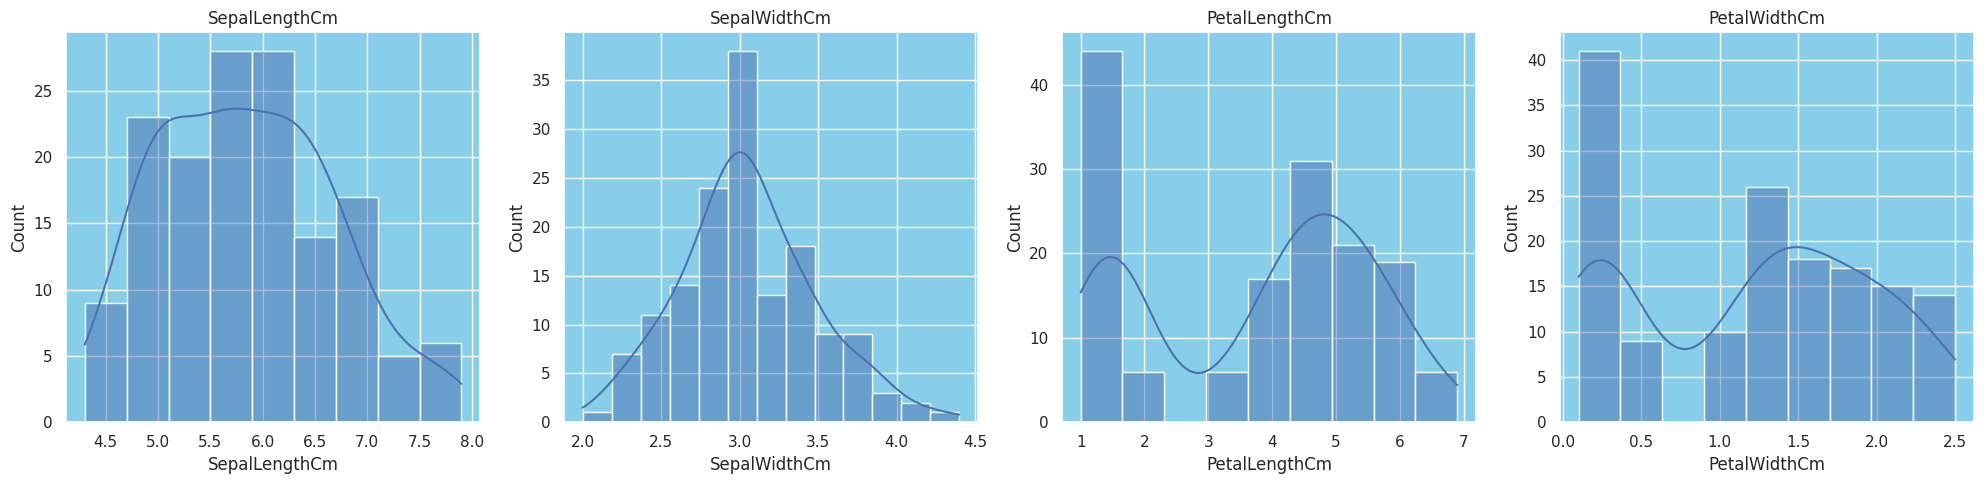

In [52]:
# Numerical Features Distribution


numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Calculate the number of rows and columns for subplots
num_features = len(numeric_features)
num_rows = math.ceil(num_features / 4)  # Adjust the number 4 based on how many plots you want per row
num_cols = min(num_features, 4)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 5*num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

sns.set_theme(style="darkgrid")

# Loop through each numerical feature and create a distribution plot with custom bar color
for i, col in enumerate(numeric_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_facecolor('skyblue')  # Set background color to skyblue
# Remove any unused subplots
for i in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()



# Based on the distribution plots of the numerical features, here are some observations:

    SepalLengthCm: The distribution is roughly symmetrical and appears to be unimodal (having one peak). It resembles a normal distribution.
    SepalWidthCm: The distribution is slightly skewed to the right (positively skewed), meaning there's a tail extending towards higher values. It also appears to be unimodal.
    PetalLengthCm: This feature shows a clearly bimodal distribution, with two distinct peaks. This is consistent with our observation from the box plot and indicates that this feature is very effective at separating different groups (species).
    PetalWidthCm: Similar to PetalLengthCm, this feature also exhibits a bimodal distribution with two distinct peaks, reinforcing its effectiveness in distinguishing between groups.

These distribution plots provide further insight into the characteristics of each numerical feature and how they might contribute to differentiating between the iris species.

# Normalization Numerical Features

#  Quantile Transformer

Quantile Transformer is a data transformation technique used in statistics and machine learning to normalize numerical features. It works by transforming the probability distribution of the data to approximately follow a uniform or normal distribution. This transformation helps in reducing skewness and making the data more suitable for certain statistical analyses or machine learning algorithms that assume normality or require standardized features.

    Standardizing Distributions: It transforms the original data distribution to closely resemble a uniform or normal distribution, which is often preferred for various statistical analyses and modeling tasks.

    Skewness Reduction: By redistributing the data values to follow a more symmetrical distribution, Quantile Transformer effectively reduces skewness, making the data more balanced and easier to analyze.

    Outlier Handling: The transformation can mitigate the impact of outliers by spreading the data across different quantiles, potentially making the dataset more robust to extreme values.

    Enhancing Model Performance: Normalizing numerical features using Quantile Transformer can improve the performance of machine learning models, especially those sensitive to the scale and distribution of input features, such as linear regression and neural networks.

Overall, Quantile Transformer plays a crucial role in preprocessing numerical data, facilitating better data normalization and improving the quality of subsequent analyses or model predictions.


In [53]:
def quantile_transform(data,cols):
    # Transformer
    qt = QuantileTransformer(output_distribution='normal')
    #Use a Loop to Transformer
    for col in cols:
        data[col] = qt.fit_transform(data[[col]])
    return data
#Transform Data
df = quantile_transform(df,numeric_features)

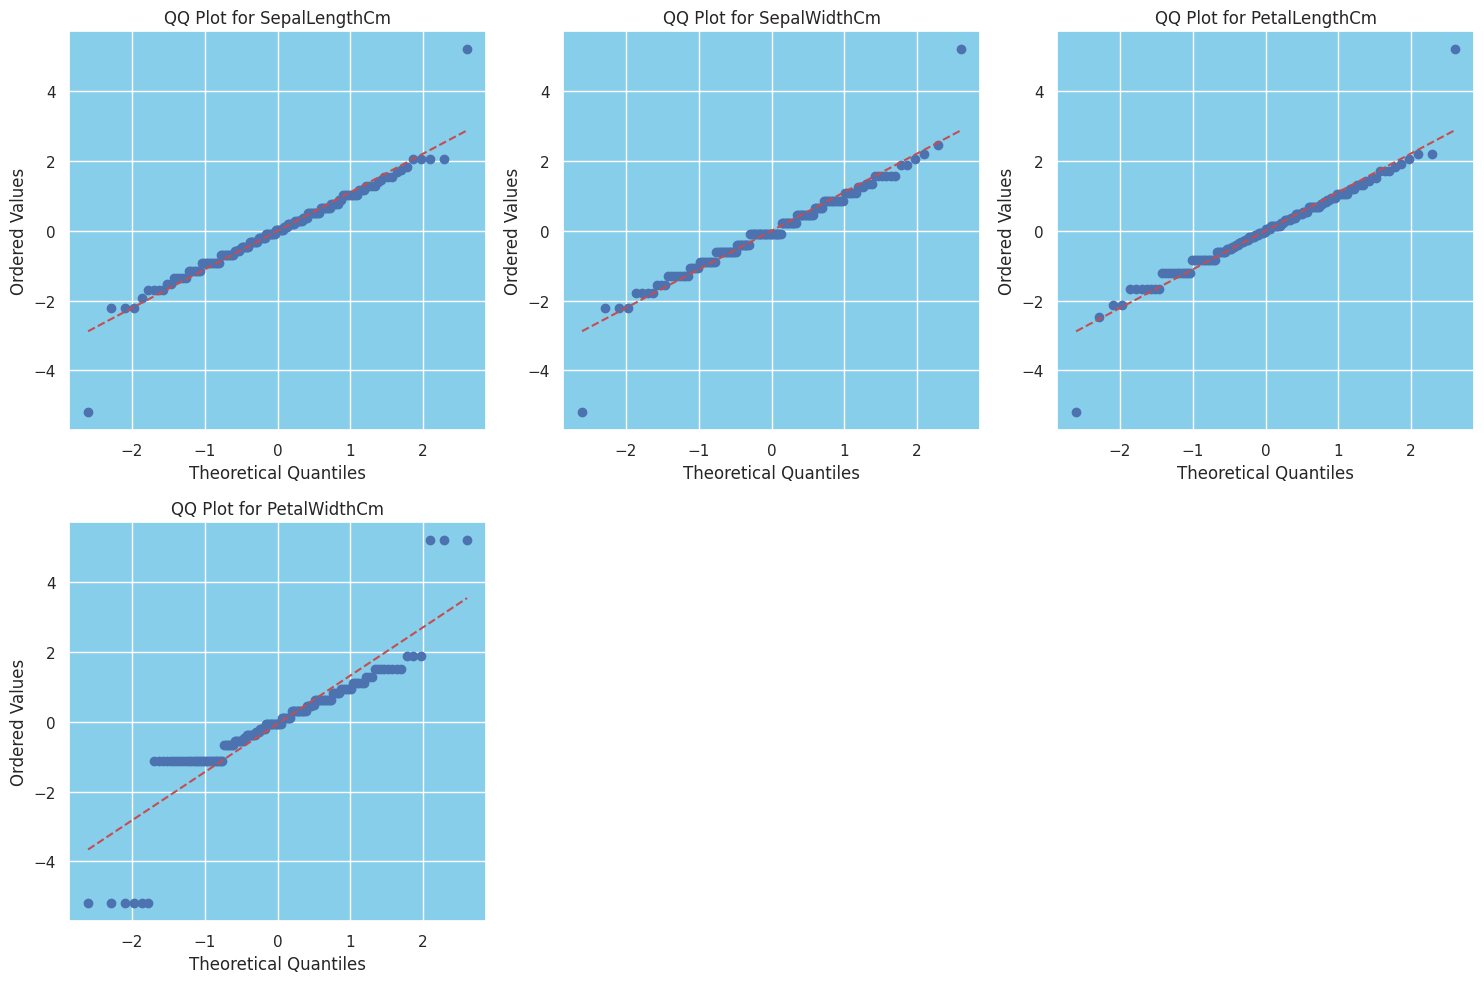

In [54]:
# Function to create QQ plots [QQ plot, or quantile-quantile plot]
def plot_qq(df_qt, feature, ax):
    stats.probplot(df_qt[feature], dist="norm", plot=ax)
    ax.get_lines()[1].set_linestyle('--')
    ax.set_title(f"QQ Plot for {feature}")
    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Ordered Values")

# Calculate the number of rows and columns for subplots
num_features = len(numeric_features)
num_cols = 3  # Number of plots per row
num_rows = math.ceil(num_features / num_cols)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 5*num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each numerical feature and create a QQ plot
for i, col in enumerate(numeric_features):
    plot_qq(df, col, axes[i])
    axes[i].set_facecolor('skyblue')

# Remove any unused subplots
for i in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

# Based on the QQ plots, which show the distribution of the numerical features after applying the Quantile Transformer with output_distribution='normal', here are the observations:

    SepalLengthCm: The points generally follow the straight line, suggesting that the quantile transformation has made the distribution of SepalLengthCm closer to a normal distribution.
    SepalWidthCm: The points also mostly adhere to the straight line, indicating that the transformation was effective in normalizing the distribution of SepalWidthCm. There might be slight deviations at the tails, but overall, it's closer to normal.
    PetalLengthCm: The QQ plot for PetalLengthCm shows that the transformation has significantly improved the normality of this feature's distribution. The points align well with the line, especially compared to its original bimodal distribution seen in the histogram.
    PetalWidthCm: Similar to PetalLengthCm, the QQ plot for PetalWidthCm demonstrates that the quantile transformation has successfully brought its distribution closer to normal. The points closely follow the straight line.

Overall, the QQ plots indicate that the Quantile Transformer has been effective in transforming the numerical features to approximate a normal distribution, which can be beneficial for certain machine learning algorithms that assume normality.

# based on the QQ plots, the data for all four numerical features (SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm) exhibits a distribution that is now much closer to a Gaussian (normal) distribution after applying the Quantile Transformer with output_distribution='normal'.

The Quantile Transformer has indeed proven to be a valuable tool in achieving this transformation, particularly for features like PetalLengthCm and PetalWidthCm that had non-normal distributions initially.

# Model Building


Model building is the process of creating and refining mathematical representations, typically using algorithms or statistical techniques, to make predictions, classifications, or gain insights from data. It involves selecting appropriate features, choosing a suitable algorithm, training the model on labeled data, and evaluating its performance using metrics like accuracy or mean squared error. Model building requires iterative experimentation, parameter tuning, and validation to ensure the resulting model generalizes well to unseen data. It is a fundamental step in machine learning and data analysis, enabling informed decision-making, pattern recognition, and predictive analytics across various domains and industries.


In [55]:
def evaluate_results(y_test, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return accuracy, precision, recall, f1

#  SVM (Support Vector Machine)
Support Vector Machine (SVM):

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression tasks. It is particularly effective in high-dimensional spaces and is widely used in fields such as image recognition, text classification, and bioinformatics.
Importance of SVM:

SVM is highly effective in dealing with complex datasets where there is a clear margin of separation between classes. It works well even in cases where the number of dimensions exceeds the number of samples. SVMs can handle both linear and non-linear data through the use of different kernel functions, making them versatile in various scenarios. Additionally, SVMs offer robustness against overfitting, as they aim to maximize the margin between classes, thereby promoting generalization to unseen data. Moreover, SVMs are computationally efficient due to the use of a subset of training points called support vectors, which significantly reduces memory usage and speeds up training.

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


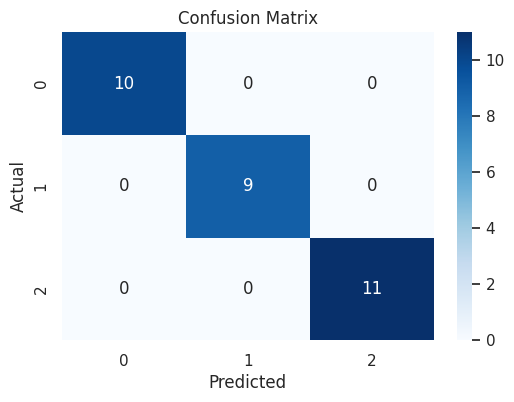

In [56]:
# Splitting the data into Features & Targets
X = df.drop(columns='Species', axis=1)
y = df['Species']

# Splitting the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_classifier = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = evaluate_results(y_test,y_pred_svm)

#  K-Nearest Neighbors (KNN)
Importance of K-Nearest Neighbors (KNN):

K-Nearest Neighbors (KNN) is a simple yet powerful algorithm used in both classification and regression tasks. Its simplicity lies in its intuitive approach: it classifies data points based on the majority class of their nearest neighbors. KNN's flexibility makes it suitable for various applications, particularly in situations where the data distribution is not well-defined or linearly separable. Additionally, KNN does not require training data for model building, making it computationally efficient for small to medium-sized datasets.

One of the key advantages of KNN is its non-parametric nature, meaning it does not make any assumptions about the underlying data distribution. This makes KNN robust to outliers and noise in the data. Moreover, KNN's performance tends to improve as the size of the training dataset grows, as it relies on local information rather than global patterns. Despite its simplicity, KNN can often perform competitively with more complex algorithms, especially in scenarios where the decision boundary is highly irregular or nonlinear.

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


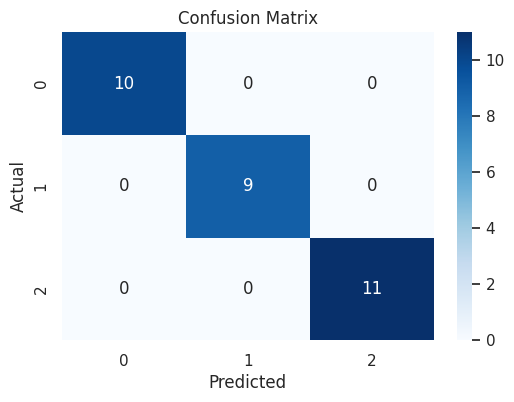

In [57]:
# Split the data into features (X) and target (y)
X = df.drop(columns='Species')
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

#Evaluate
accuracy_knn = evaluate_results(y_test, y_pred_knn)

# Decision Tree Classifier

Decision Trees are powerful machine learning models used for both classification and regression tasks. They work by recursively partitioning the input space into regions, with each split being chosen to minimize impurity or maximize information gain. One of the main advantages of Decision Trees is their interpretability, as they can be easily visualized and understood by humans. They are also robust to outliers and can handle both numerical and categorical data without requiring preprocessing. Moreover, Decision Trees implicitly perform feature selection by selecting the most informative features at each split. However, they are prone to overfitting, especially with deep trees, and can be sensitive to small variations in the training data. Despite these limitations, Decision Trees are widely used in practice due to their simplicity, interpretability, and ability to handle complex datasets.

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


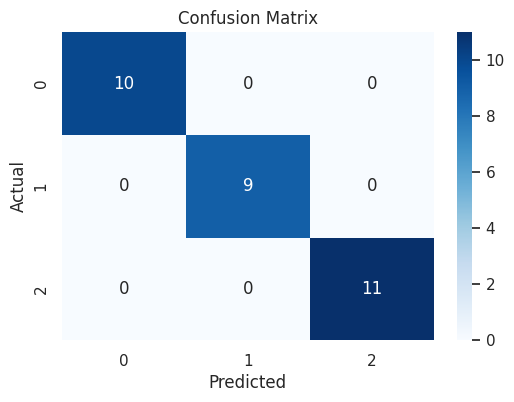

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(columns='Species')
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = evaluate_results(y_test, y_pred_dt)

In [ ]:
# Conclusion !!!


print('1. We have trained three models to evaluate their performance:')
print(f'- The SVM model achieved an accuracy of {accuracy_svm[0]:.2f}.')
print(f'- The KNN model achieved an accuracy of {accuracy_knn[0]:.2f}.')
print(f'- The Decision Tree model achieved an accuracy of {accuracy_dt[0]:.2f}.')
print(f'As we Know All The Models are Performing Well and giving Accuracy of 100%')



1. We have trained three models to evaluate their performance:
- The SVM model achieved an accuracy of 1.00.
- The KNN model achieved an accuracy of 1.00.
- The Decision Tree model achieved an accuracy of 1.00.
As we Know All The Models are Performing Well and giving Accuracy of 100%


In [58]:
# Define model names and accuracies
model_names = ['SVM', 'KNN', 'Decision Tree']
accuracies = [accuracy_svm[0], accuracy_knn[0], accuracy_dt[0]]

# Create a bar plot
fig = go.Figure(data=[go.Bar(x=model_names, y=accuracies, marker_color='skyblue')])
fig.update_layout(
                  title='Model Accuracies',
                  xaxis_title='Model',
                  yaxis_title='Accuracy',
                  yaxis=dict(tickformat=".2%"))
fig.show()